In [6]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
from random import shuffle
import cv2
from ipynb.fs.full.read_data import *


# cnt=0
# for subdir, dirs, files in os.walk(rootdir):
#     for file in files:
#         path=os.path.join(subdir, file)
#         num=path.split('(')[0]
#         sec_num=num.split('/')
#         #print(int(sec_num[1][0:3]))
#         cnt+=1
# print(cnt)  
IMG_SIZE = 50
LR = 1e-3
#epochs used are 15 here, layers are 5
MODEL_NAME = 'genderRecog-param-tun-5-layer-15-training-acc-check-5-{}-{}.model'.format(LR, 'CNN')

In [34]:
# def label_img(img):
#     num=img.split('(')[0]
#     sec_num=num.split('/')
#     my_num=int(sec_num[1][0:3])
#     if my_num >= 1 and my_num <= 98:
#         return [1,0]
#     elif my_num >= 99 and my_num <=164:
#         return [0,1]

In [35]:
# def create_data():
#     data = []
#     for subdir, dirs, files in os.walk(rootdir):
#         for file in files:
#             #print(file)
            
#             path=os.path.join(subdir, file)
#             label=label_img(path)
#             file = cv2.resize(cv2.imread(path, cv2.IMREAD_GRAYSCALE), (IMG_SIZE,IMG_SIZE))
            
#             data.append([np.array(file),np.array(label)])
            
#     shuffle(data)
#     #print(data[0])
#     return data

In [7]:
#create_data()

data = create_data()
#data

In [8]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.reset_default_graph()
#Pooling layers are a way to reduce the size 
#of the image interpretation in order to speed up computation,
#and it makes the detected features more robust.

#Here max_pooling is used

#pooling is a way to prevent overfitting, since we are removing some features from the input image.

# input layer will be 50*50
# currently 7 hidden layers, tested for 2,3,5 layers as well
convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)
# 2 neurons in the output layer(Male/female)
convnet = fully_connected(convnet, 2, activation='softmax')
#Categorical crossentropy is a loss function that is used for single label
#categorization. This is when only one category is applicable for each data point. 
#In other words, an example can belong to one class only.
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')
import warnings
warnings.filterwarnings('ignore')

In [9]:
if os.path.exists('{}.meta'.format(MODEL_NAME)):
    model.load(MODEL_NAME)
    print('model loaded!')

In [10]:
train = data[:-7000]
test = data[-7000:]

In [11]:
X = np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_y = [i[1] for i in test]



In [9]:
# epochs = []
# for i in range(1,12):
#     epochs.append(i)
    
# epochs

In [10]:

# my_val_acc = []
# my_loss = []
# for i in epochs:
#     model.fit({'input': X}, {'targets': Y}, n_epoch=i, validation_set=({'input': test_x}, {'targets': test_y}), 
#     snapshot_step=500, show_metric=True, run_id=MODEL_NAME)
#     model.save(MODEL_NAME)
#     my_val_acc.append(tf.train.load_variable(
#     "./", 'val_acc'
#     ))
#     my_loss.append(tf.train.load_variable(
#     "./", 'val_loss'
#     ))

In [12]:
## Training new model with 10 epochs
model.fit({'input': X}, {'targets': Y}, n_epoch=15, validation_set=({'input': test_x}, {'targets': test_y}), 
    snapshot_step=500, show_metric=True, run_id=MODEL_NAME)
model.save(MODEL_NAME)

Training Step: 5024  | total loss: 0.12958 | time: 28.346s
| Adam | epoch: 015 | loss: 0.12958 - acc: 0.9527 -- iter: 21376/21412
Training Step: 5025  | total loss: 0.12964 | time: 30.738s
| Adam | epoch: 015 | loss: 0.12964 - acc: 0.9543 | val_loss: 0.40414 - val_acc: 0.8721 -- iter: 21412/21412
--
INFO:tensorflow:C:\Users\priya\Documents\Gender-Recog\genderRecog-param-tun-5-layer-15-training-acc-check-5-0.001-CNN.model is not in all_model_checkpoint_paths. Manually adding it.


In [12]:
#my_val_acc

In [13]:
#my_loss

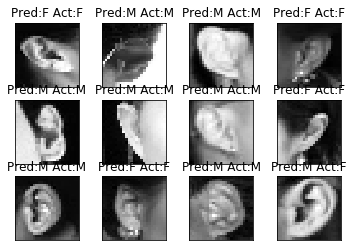

In [14]:
import matplotlib.pyplot as plt
test = data[-500:]
shuffle(test)
# for num,my_data in enumerate(test[:100]):
#     print(num)
#     print(my_data[1])

fig=plt.figure()

for num,my_data in enumerate(test[:12]):
    
    
    img_num = my_data[1]
    img_data = my_data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    my_data = img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    #model_out = model.predict([data])[0]
    model_out = model.predict([my_data])[0]
    
    if np.argmax(model_out) == 1: str_label='Pred:F'
    else: str_label='Pred:M'
    if img_num[0] == 1: my_label=' Act:M'
    else:
        my_label=' Act:F'
    y.imshow(orig,cmap='gray')
    plt.title(str_label+my_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()

In [57]:
tf.train.load_variable(
    "./",'Conv2D/W/Adam'
)

array([[[[-4.69611492e-03,  1.86246447e-03,  2.44138716e-03,
          -9.60953720e-03,  4.97729518e-03, -1.88812101e-03,
          -1.29074501e-02, -1.88466236e-02, -4.37506381e-03,
           1.53395236e-02, -2.73159845e-03, -1.44927893e-02,
           2.70795077e-03,  2.67160824e-03, -9.87856369e-03,
          -9.08721145e-03, -8.87948181e-03,  4.30613151e-03,
           4.00864519e-03,  4.87004407e-03,  1.04688946e-02,
           4.43469593e-03,  4.50065080e-03,  5.42519940e-03,
          -4.15218202e-03, -3.98291741e-04, -4.72214352e-03,
           1.29634850e-02,  1.36416797e-02, -5.37597574e-03,
          -7.89051689e-03, -5.00259455e-03]],

        [[-3.57261812e-03, -1.54904928e-03,  7.28812884e-04,
          -1.06015317e-02,  3.19505855e-03, -4.24669124e-05,
          -1.17545994e-02, -1.98020842e-02, -1.77835906e-03,
           1.22335628e-02, -9.23078042e-03, -1.53737450e-02,
           8.51651770e-04, -7.16991257e-03, -7.06142560e-03,
          -5.69886621e-03,  1.81405945

In [16]:
# my_list=[]
# my_list.append(tf.train.load_variable(
#     "./", 'val_loss'
# ))

In [17]:
# my_list

In [18]:
# epochs

In [19]:
# act_epochs=[1]
# for i in range(1,11):
#     act_epochs.append(epochs[i]+act_epochs[i-1])

In [42]:
# act_epochs
layers = [2,3,5,7]
# manually noted accuracies and losses
my_val_acc=[37.74,85.49,87,85.06]
my_val_loss=[14.33,0.41246,0.334,0.35879]
my_train_acc=[37.35,92.69,91.93,88.55]
my_train_loss=[14.42,0.2,0.21,0.28512]

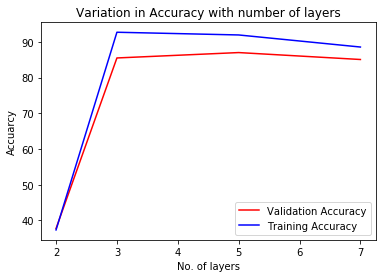

In [44]:
plt.plot(layers, my_val_acc, color='red', label='Validation Accuracy')
plt.plot(layers, my_train_acc, color='blue', label='Training Accuracy')
plt.xlabel('No. of layers')
plt.ylabel('Accuarcy')
plt.title('Variation in Accuracy with number of layers')
plt.legend()
plt.show()

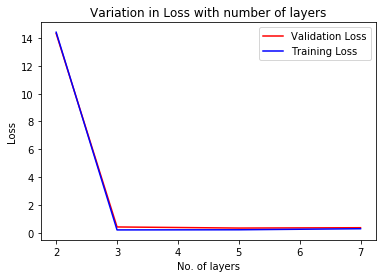

In [45]:
plt.plot(layers, my_val_loss, color='red', label='Validation Loss')
plt.plot(layers, my_train_loss, color='blue', label='Training Loss')
plt.xlabel('No. of layers')
plt.ylabel('Loss')
plt.title('Variation in Loss with number of layers')
plt.legend()
plt.show()

### optimal is to use 5 layers in our CNN model as loss here is minimum and accuracy is high

In [46]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [47]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16619315585629921908
]


In [49]:
help(input_data)

Help on function input_data in module tflearn.layers.core:

input_data(shape=None, placeholder=None, dtype=tf.float32, data_preprocessing=None, data_augmentation=None, name='InputData')
    Input Data.
    
    This layer is used for inputting (aka. feeding) data to a network.
    A TensorFlow placeholder will be used if it is supplied,
    otherwise a new placeholder will be created with the given shape.
    
    Either a shape or placeholder must be provided, otherwise an
    exception will be raised.
    
    Furthermore, the placeholder is added to TensorFlow collections
    so it can be retrieved using tf.get_collection(tf.GraphKeys.INPUTS)
    as well as tf.GraphKeys.LAYER_TENSOR + '/' + name. Similarly for
    the data preprocessing and augmentation objects which are stored in
    the collections with tf.GraphKeys.DATA_PREP and tf.GraphKeys.DATA_AUG.
    This allows other parts of TFLearn to easily retrieve and use these
    objects by referencing these graph-keys.
    
    Inpu

In [50]:
help(conv_2d)

Help on function conv_2d in module tflearn.layers.conv:

conv_2d(incoming, nb_filter, filter_size, strides=1, padding='same', activation='linear', bias=True, weights_init='uniform_scaling', bias_init='zeros', regularizer=None, weight_decay=0.001, trainable=True, restore=True, reuse=False, scope=None, name='Conv2D')
    Convolution 2D.
    
    Input:
        4-D Tensor [batch, height, width, in_channels].
    
    Output:
        4-D Tensor [batch, new height, new width, nb_filter].
    
    Arguments:
        incoming: `Tensor`. Incoming 4-D Tensor.
        nb_filter: `int`. The number of convolutional filters.
        filter_size: `int` or `list of int`. Size of filters.
        strides: 'int` or list of `int`. Strides of conv operation.
            Default: [1 1 1 1].
        padding: `str` from `"same", "valid"`. Padding algo to use.
            Default: 'same'.
        activation: `str` (name) or `function` (returning a `Tensor`) or None.
            Activation applied to this lay

In [51]:
help(max_pool_2d)

Help on function max_pool_2d in module tflearn.layers.conv:

max_pool_2d(incoming, kernel_size, strides=None, padding='same', name='MaxPool2D')
    Max Pooling 2D.
    
    Input:
        4-D Tensor [batch, height, width, in_channels].
    
    Output:
        4-D Tensor [batch, pooled height, pooled width, in_channels].
    
    Arguments:
        incoming: `Tensor`. Incoming 4-D Layer.
        kernel_size: `int` or `list of int`. Pooling kernel size.
        strides: `int` or `list of int`. Strides of conv operation.
            Default: same as kernel_size.
        padding: `str` from `"same", "valid"`. Padding algo to use.
            Default: 'same'.
        name: A name for this layer (optional). Default: 'MaxPool2D'.
    
    Attributes:
        scope: `Scope`. This layer scope.



In [52]:
help(fully_connected)

Help on function fully_connected in module tflearn.layers.core:

fully_connected(incoming, n_units, activation='linear', bias=True, weights_init='truncated_normal', bias_init='zeros', regularizer=None, weight_decay=0.001, trainable=True, restore=True, reuse=False, scope=None, name='FullyConnected')
    Fully Connected.
    
    A fully connected layer.
    
    Input:
        (2+)-D Tensor [samples, input dim]. If not 2D, input will be flatten.
    
    Output:
        2D Tensor [samples, n_units].
    
    Arguments:
        incoming: `Tensor`. Incoming (2+)D Tensor.
        n_units: `int`, number of units for this layer.
        activation: `str` (name) or `function` (returning a `Tensor`).
            Activation applied to this layer (see tflearn.activations).
            Default: 'linear'.
        bias: `bool`. If True, a bias is used.
        weights_init: `str` (name) or `Tensor`. Weights initialization.
            (see tflearn.initializations) Default: 'truncated_normal'.
     

In [53]:
 tf.train.list_variables("./")

[('Accuracy/Mean/moving_avg', []),
 ('Adam/beta1_power', []),
 ('Adam/beta2_power', []),
 ('Conv2D/W', [5, 5, 1, 32]),
 ('Conv2D/W/Adam', [5, 5, 1, 32]),
 ('Conv2D/W/Adam_1', [5, 5, 1, 32]),
 ('Conv2D/b', [32]),
 ('Conv2D/b/Adam', [32]),
 ('Conv2D/b/Adam_1', [32]),
 ('Conv2D_1/W', [5, 5, 32, 64]),
 ('Conv2D_1/W/Adam', [5, 5, 32, 64]),
 ('Conv2D_1/W/Adam_1', [5, 5, 32, 64]),
 ('Conv2D_1/b', [64]),
 ('Conv2D_1/b/Adam', [64]),
 ('Conv2D_1/b/Adam_1', [64]),
 ('Conv2D_2/W', [5, 5, 64, 128]),
 ('Conv2D_2/W/Adam', [5, 5, 64, 128]),
 ('Conv2D_2/W/Adam_1', [5, 5, 64, 128]),
 ('Conv2D_2/b', [128]),
 ('Conv2D_2/b/Adam', [128]),
 ('Conv2D_2/b/Adam_1', [128]),
 ('Conv2D_3/W', [5, 5, 128, 256]),
 ('Conv2D_3/W/Adam', [5, 5, 128, 256]),
 ('Conv2D_3/W/Adam_1', [5, 5, 128, 256]),
 ('Conv2D_3/b', [256]),
 ('Conv2D_3/b/Adam', [256]),
 ('Conv2D_3/b/Adam_1', [256]),
 ('Conv2D_4/W', [5, 5, 256, 128]),
 ('Conv2D_4/W/Adam', [5, 5, 256, 128]),
 ('Conv2D_4/W/Adam_1', [5, 5, 256, 128]),
 ('Conv2D_4/b', [128]),
 (